In [56]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import pathlib
import spacy
from spacy.lang.en import English
from spacy.lang.en.stop_words import STOP_WORDS
from string import punctuation
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras import layers
import keras

In [30]:
# Loading the dataset 
data_dir = pathlib.Path('/home/lv11/Documents/ProyectosPython/sentimentAnalysis/train')
nf = pd.read_csv(data_dir / 'tweetsDataset1.csv',skiprows=1,names=['Message','Target'])
#print(nf.head(20))

nlp = English()
stop_words = list(STOP_WORDS)
#print(stop_words)

def spacy_tokenizer(sentence):
    tokens = nlp(sentence)
    tokens = [ word.lemma_.lower().strip() if word.lemma_ != '-PRON-' else word.lower_ for word in tokens ]
    tokens = [ word for word in tokens if word not in stop_words and word not in punctuation ]
    return tokens

Message  Target
0                                             Hi Guys       1
1             it's just got 3 years longer unhappy          0
2   Hey thanks for being top new followers this we...       1
3                                 I know how you feel       0
4                                          huh? happy       1
5                             Didn't keep it unhappy        0
6                                These are for  happy       1
7   unhappy  how come people like this have childr...       0
8                                  Bapak Tom Cruise.        0
9   help me too unhappy  as an early birthday gift...       0
10  Shoutout to for the donation. Looks like I'm s...       1
11                             Good luck Swampy happy       1
12  lets agree she put her brain on knees crying w...       1
13                                         Nitpicking       1
14                 unhappy  :/ unhappy   feeling sick       0
15                      which is good for him happy.1 

In [31]:
vectorizer = CountVectorizer(min_df=0, lowercase=False)
vectorizer.fit(nf['Message'])
#print(vectorizer.vocabulary_)

vectorizer.transform(nf['Message']).toarray()

messages = nf['Message']
labels = nf['Target']

In [32]:
x_train, x_test, y_train, y_test = train_test_split(messages,labels,test_size=0.25,random_state=1000,shuffle=True)

len(x_train)
len(x_test)

576

In [33]:
vectorizer.fit(x_train)
X_train = vectorizer.transform(x_train).toarray()
X_test = vectorizer.transform(x_test).toarray()

#rint(X_train)
#print(X_test)

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [34]:
features = 3749
shufle = True
drop = 0.5
layer1 = 512
layer2 = 256
epoch = 5
lr = 0.002
epsilon = 1e-9
validation = 0.1

In [35]:
model = Sequential()
model.add(layers.Dense(layer1, input_dim=features,activation='relu'))
model.add(layers.Dropout(drop))
model.add(layers.Dense(layer2,activation='sigmoid'))
model.add(layers.Dropout(drop))
model.add(layers.Dense(3,activation='softmax'))

In [36]:
optimizer = keras.optimizers.Adam(lr=lr, beta_1=0.9, beta_2=0.999, epsilon=epsilon,decay=0.0,amsgrad=False)

In [37]:
model.compile(loss='sparse_categorical_crossentropy',optimizer=optimizer,metrics=['accuracy'])
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 512)               1920000   
_________________________________________________________________
dropout_3 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_5 (Dense)              (None, 256)               131328    
_________________________________________________________________
dropout_4 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_6 (Dense)              (None, 3)                 771       
Total params: 2,052,099
Trainable params: 2,052,099
Non-trainable params: 0
_________________________________________________________________


In [38]:
history = model.fit(np.array(X_train),y_train,batch_size=32,epochs=epoch,verbose=1,validation_split=validation,shuffle=shufle)

Train on 1554 samples, validate on 173 samples
Epoch 1/5
1554/1554 [==============================] - 3s 2ms/step - loss: 0.4976 - accuracy: 0.7452 - val_loss: 0.2153 - val_accuracy: 0.8960
Epoch 2/5
1554/1554 [==============================] - 2s 2ms/step - loss: 0.1303 - accuracy: 0.9414 - val_loss: 0.1871 - val_accuracy: 0.9133
Epoch 3/5
1554/1554 [==============================] - 2s 1ms/step - loss: 0.0530 - accuracy: 0.9775 - val_loss: 0.2501 - val_accuracy: 0.8786
Epoch 4/5
1554/1554 [==============================] - 3s 2ms/step - loss: 0.0267 - accuracy: 0.9903 - val_loss: 0.3059 - val_accuracy: 0.8613
Epoch 5/5
1554/1554 [==============================] - 2s 2ms/step - loss: 0.0104 - accuracy: 0.9981 - val_loss: 0.2652 - val_accuracy: 0.9075


In [39]:
pred = model.predict(X_test)
#pred

array([[2.1640606e-04, 9.9977070e-01, 1.2868264e-05],
       [9.9878782e-01, 1.1927312e-03, 1.9571573e-05],
       [3.8636982e-04, 9.9959189e-01, 2.1762982e-05],
       ...,
       [5.8837805e-04, 9.9938893e-01, 2.2633656e-05],
       [9.9981850e-01, 1.7724191e-04, 4.2462484e-06],
       [1.7137612e-05, 9.9997866e-01, 4.1244689e-06]], dtype=float32)

In [55]:
xtest = [x for x in x_test]
for i in range(len(pred)):
    sent = (1 if pred[i][1] > 0.5 else 0)
    print("tweet=",xtest[i], " || prediction=",sent)

snap chat unhappy   || prediction= 0
tweet=  it's just got 3 years longer unhappy     || prediction= 0
tweet= so sorry I havent been checking my tweets unhappy  We are all here for you!  || prediction= 0
tweet= Alright. Looks like back to chores behind the scenes. My page hits drop to 1K daily when I don't visit and post. unhappy   || prediction= 0
tweet= come back callie  gabbie d ghost unhappy  i love you both  || prediction= 0
tweet= unhappy  :/ unhappy   feeling sick  || prediction= 0
tweet= same unhappy    || prediction= 0
tweet= Thanks for the recent follow Happy to connect happy  have a great Thursday..10  || prediction= 1
tweet= Koalas are dying of thirst  and it's all because of us unhappy  .8  || prediction= 0
tweet= Definitely my arms unhappy  .14  || prediction= 0
tweet= unhappy  oh man..  || prediction= 0
tweet= good crying with joy  i love you so much  || prediction= 1
tweet= Guess who's not getting a unicorn frappuccino because they're sold out unhappy .1  || prediction=

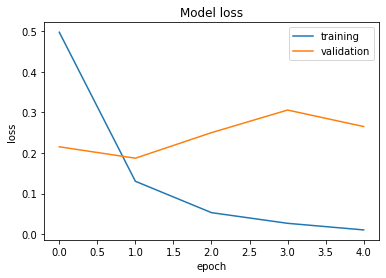

In [41]:
plt.title('Model loss')
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['training','validation'],loc='upper right')
plt.show()

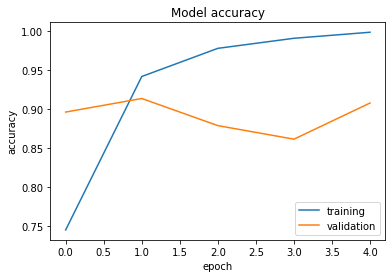

In [42]:
plt.title('Model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['training', 'validation'], loc='lower right')
plt.show()

In [ ]:
test_loss, test_acc = model.evaluate(X_test,y_test)
print("test loss:", test_loss)
print("test accuracy:", test_acc)